# Predicting Vehicle MSRP using Multiple Regression Analysis
#### By: Connor Schultz and Aiden Bull

### 1. Introduction

Intro goes here.



### 2. Data and Analysis Methods
#### 2.1 Data
#### 2.2 Analysis Methods

In [69]:
# Import required python3 packages
import os
import numpy as np
import pandas as pd
import nbinteract as nbi
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.svm import SVR
from sklearn.linear_model import Ridge

In [154]:
# Read data in from processed .csv file
cwd = os.getcwd()
data = pd.read_csv(cwd+"/car_data/proc_cars.csv")
data = data.drop(columns = ['Unnamed: 0'])

In [159]:
# Prepare data for regression analysis
y = data['MSRP']
X = data.drop(columns = ['MSRP'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
y_train.shape

(9655,)

In [160]:
# Building models
#lin = LinearRegression().fit(X_train, y_train)
ridge = Ridge().fit(X_train, y_train)
#lasso = Lasso(alpha=0.000001).fit(X_train, y_train)
#svr = SVR().fit(X_train, y_train)

In [161]:
# Prediction
errors = []
for i in range(0, X_test.shape[0]):
    #x_i = lin.predict([X_test.iloc[i, :]])
    #x_i = ridge.predict([X_test.iloc[i, :]])
    #x_i = svr.predict([X_test.iloc[i, :]])
    x_i = lasso.predict([X_test.iloc[i, :]])

    y_i = y_test.iloc[i]
    e = abs(x_i - y_i) / y_i
    errors.append(e)


### 3. Results

In [45]:
# =============== Results Section ========================
# plots, histograms, statistics, accuracy etc... 


In [163]:
# Errors and Accuracy
print("Maximum error: %f" % (np.max(errors)))
print("Minimum error: %f" % (np.min(errors)))
print("Mean error: %f" % (np.mean(errors)))


Maximum error: 4.183100
Minimum error: 0.000063
Mean error: 0.161529


In [100]:
# Coefficients
#print(lin.coef_)
print(ridge.coef_)
#print(svr.coef_)
#print(lasso.coef_)


[-1.24455524e+02  4.78170696e+03 -3.40886757e+02  1.59883770e+02
 -1.30435269e+03  1.27693018e+03 -1.08855256e+00  8.16745506e-01
  3.38617113e+01  2.22176720e+01 -1.82858654e+02  5.10263813e+03
  4.36537031e+02  6.73179458e+02  3.53339215e+03  7.67816552e+03
 -5.80386072e+02 -1.22313126e+03  3.38443110e+03 -7.00912587e+02
 -5.63447132e+02 -4.53970906e+02  1.92348673e+03  7.75539309e+03
  6.65942269e+02  9.11355889e+03 -6.99944729e+02  2.82286578e+03
  2.95339014e+03  2.12995603e+03  1.64602468e+03 -2.68362533e+03
  3.23523809e+03  1.72131247e+03 -3.38191049e+03  1.10898526e+03
  8.07175584e+02 -8.88548426e+03  8.88728988e+02  1.12914166e+02
 -1.88351298e+03 -2.53102036e+03  4.48448576e+03  6.75888457e+03
  5.00856902e+03  8.12474093e+03 -6.24058139e+03  3.31490565e+03
 -5.55564002e+02  1.83200055e+03 -2.51693228e+03 -1.70076623e+03
 -7.01854371e+03 -4.48169129e+04 -1.04582342e+04 -9.69524376e+03
 -6.34967480e+03 -9.38253217e+02  9.90262596e+03  6.23556929e+04
  2.76880102e+04 -8.97595

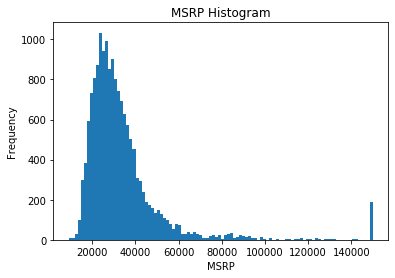

In [48]:
print("Hist test")
plt.hist(y,bins = 100)
plt.xlabel('MSRP')
plt.ylabel('Frequency')
plt.title('MSRP Histogram');
